# Pricing of GMAB and GMDB

### Question 1

Analytical expressions of the GMAB at time t ≤ T:

 - using call options:

In [29]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import pandas as pd


def call__analytic_opt_price(K1,K2,S,T,t,sigma,r):

    g1 = (np.log(S/K2) + r-0.5*(sigma)**2)*(T-t)/(sigma*np.sqrt(T-t))
    g2 = g1 + (sigma*np.sqrt(T-t))
    d1 = (np.log(S/K1) + (r-0.5*(sigma)**2))*(T-t)/(sigma*np.sqrt(T-t))
    d2 = d1 + (sigma*np.sqrt(T-t))

    spread = K2*(1-norm.cdf(-g1)) + S*((norm.cdf(d1))-(norm.cdf(g1))) - K1*((norm.cdf(d2))-(norm.cdf(g2)))*np.exp(-r*(T-t))

    return spread


- using put opitions: 

In [ ]:
def put__analytic_opt_price(K1,K2,S,T,t,sigma,r):
	pass

### Question 2

Binomial tree to price a GMAB of maturity T=8 years

### Question 3

Analytical expressions of the GMAB at time t ≤ T:

- using call options:

- using put options:

### Question 4

Binomial tree to price a GMDB of maturity T=8 years

97.52703280679253

# Pricing of a maximum return insurance

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import pandas as pd

### Question 1

From the file "Data_project.xlsx": 

In [ ]:
def import_excel(file_path):
    ''' Imports xlxs file in the provided path.'''
    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)
        
        # Check if the required columns are present
        
        if not all(column in df.columns for column in required_columns):
            raise ValueError("Required columns are missing in the Excel file.")

        return df

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
    except Exception as e:
        print("An error occurred:", e)

def calculate_daily_return(df):
    ''' Calculate the returns for the indexs in the columns.'''

    avg_return_idx = []
    std_return_idx = []

    cols = df.column()
    for col in cols:
        df[f'return_{col}'] = df[col].pct_change()
    
    return df

def calculate_statistics(df):
    # Calculate averages
    avg_return_index1 = df['Return_Eurxx50'].mean()
    avg_return_index2 = df['Return_Amex'].mean()

    # Calculate standard deviations
    std_return_index1 = df['Return_Eurxx50'].std()
    std_return_index2 = df['Return_Amex'].std()

    # Calculate correlation
    correlation = df['Return_Eurxx50'].corr(df['Return_Amex'])

    return avg_return_index1, avg_return_index2, std_return_index1, std_return_index2, correlation


# Data
So = 15000
index1 = "Eurxx50"
index2 = "Amex"
required_columns = ['Date', index1, index2] 

# Import data
file_path = "/mnt/c/buildbr/finance-stochastic-24/data/Data_project.xlsx"  
data = import_excel(file_path)

# Calculate returns
if data is not None:
    data = calculate_daily_return(data)
    print(data)

if data is not None:
    data = calculate_daily_return(data)
    avg_return_index1, avg_return_index2, std_return_index1, std_return_index2, correlation = calculate_statistics(data)


In [1]:




def calculate_daily_to_annual_metrics(df):
    # Calculate annual standard deviations
    annual_std_index1 = df['Return_Eurxx50'].std() * (252**0.5)
    annual_std_index2 = df['Return_Amex'].std() * (252**0.5)

    # Calculate annual returns
    annual_return_index1 = df['Return_Eurxx50'].mean() * 252
    annual_return_index2 = df['Return_Amex'].mean() * 252

    # Calculate covariance matrix
    covariance_matrix = df[['Return_Eurxx50', 'Return_Amex']].cov() * 252

    return annual_std_index1, annual_std_index2, annual_return_index1, annual_return_index2, covariance_matrix

- Daily returns of each indice

          Date      Eurxx50         Amex  Return_Eurxx50  Return_Amex
0   2022-02-07  4120.560059  3735.790039             NaN          NaN
1   2022-02-08  4129.250000  3711.939941        0.002109    -0.006384
2   2022-02-09  4204.089844  3733.330078        0.018124     0.005763
3   2022-02-10  4197.069824  3713.290039       -0.001670    -0.005368
4   2022-02-11  4155.229980  3810.250000       -0.009969     0.026112
..         ...          ...          ...             ...          ...
498 2024-01-29  4639.359863  4522.080078        0.000839    -0.002262
499 2024-01-30  4662.700195  4573.000000        0.005031     0.011260
500 2024-01-31  4648.399902  4499.319824       -0.003067    -0.016112
501 2024-02-01  4638.600098  4486.240234       -0.002108    -0.002907
502 2024-02-02  4654.549805  4443.890137        0.003438    -0.009440

[503 rows x 5 columns]


- Averages, standard deviations and correlation of daily returns.

In [4]:
if data is not None:
    data = calculate_daily_return(data)
    avg_return_index1, avg_return_index2, std_return_index1, std_return_index2, correlation = calculate_statistics(data)
    print("Average daily return for Eurxx50:", avg_return_index1)
    print("Average daily return for Amex:", avg_return_index2)
    print("Standard deviation of daily return for Eurxx50:", std_return_index1)
    print("Standard deviation of daily return for Amex:", std_return_index2)
    print("Correlation between daily returns of Eurxx50 and Amex:", correlation)

Average daily return for Eurxx50: 0.0003158154915777397
Average daily return for Amex: 0.00046371824065852307
Standard deviation of daily return for Eurxx50: 0.012109114959043299
Standard deviation of daily return for Amex: 0.015357338385754163
Correlation between daily returns of Eurxx50 and Amex: 0.30606557576853666


In [5]:
if data is not None:
    data = calculate_daily_return(data)
    annual_std_index1, annual_std_index2, annual_return_index1, annual_return_index2, covariance_matrix = calculate_annual_metrics(data)
    print("Annual Standard Deviation of Eurxx50:", annual_std_index1)
    print("Annual Standard Deviation of Amex:", annual_std_index2)
    print("Annual Return of Eurxx50:", annual_return_index1)
    print("Annual Return of Amex:", annual_return_index2)
    print("\nCovariance Matrix:")
    print(covariance_matrix)

Annual Standard Deviation of Eurxx50: 0.19222624067232394
Annual Standard Deviation of Amex: 0.24379018901142985
Annual Return of Eurxx50: 0.0795855038775904
Annual Return of Amex: 0.11685699664594781

Covariance Matrix:
                Return_Eurxx50  Return_Amex
Return_Eurxx50        0.036951     0.014343
Return_Amex           0.014343     0.059434


### Question 2
The interest rate is equal r = 3.75% and the maturity is T. Using the parameters estimated from Q1, evaluate the maximum return insurance with a
closed form expression (present and brifly comment it) for T = 1, 2, ...10 years (t = 0).

### Question 3
Price the contract by Monte-Carlo simulations for T = 1, 2, ...10 years. Compare your results with those obtained with the closed-form expression. Test different steps of time and check the convergence.

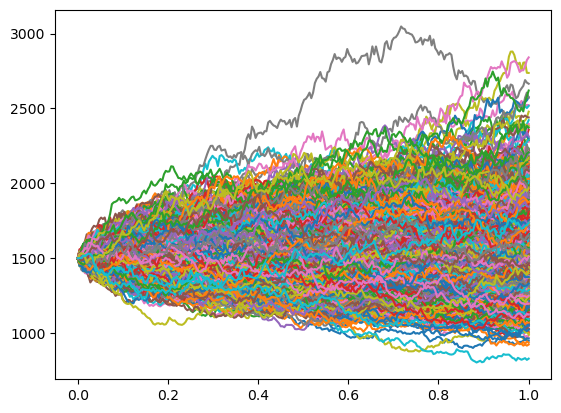

In [16]:
def monte_carlo_simulation(S0, r, sigma, T, Nt, MSC):
    dt = T / Nt
    S = np.zeros((MSC, Nt))
    S[:, 0] = S0
    for j in range(Nt - 1):
        S[:, j + 1] = S[:, j] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1, MSC))
    ST = S[:, -1]
    return ST



S0 = 1500
r=0.0375
Nt = 252

sigma = annual_std_index1 # for Eurxx50 and Amex

MSC = 1000

# for T in range(1, 11):
#     t = np.linspace(0, T, Nt)
    
#     stock_prices = monte_carlo_simulation(S0, r, sigma, T, Nt, MSC)
#     for i in range(0, MSC):
#         plt.plot(t, stock_prices[i,:])    
T = 1
    
# dt = T/Nt
S = np.zeros([MSC,Nt])

# stock_prices = monte_carlo_simulation(S0, r, sigma, T, Nt, MSC)

S[:,0] = S0
for j in range(0, Nt-1):
    S[:,j+1] = S[:,j]*np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.normal(0,1, MSC))
ST = S[:, -1] 

# ST = monte_carlo_simulation(S0, r, sigma, T, Nt, MSC)

np.mean(ST)

t = np.linspace(0,T,Nt)

for i in range(0,MSC):
   plt.plot(t,S[i,:])
plt.show()



In [23]:
print(len(S))

1000


In [23]:
def monte_carlo_simulation(S0, r, sigma, T, Nt, MSC):
    dt = T / Nt
    S = np.zeros((MSC, Nt))
    S[:, 0] = S0
    for j in range(Nt - 1):
        S[:, j + 1] = S[:, j] * np.exp((r - sigma ** 2 / 2) * dt +
                                        sigma * np.sqrt(dt) * np.random.normal(0, 1, MSC))
    ST = S[:, -1]
    return ST

# Constants
S0 = 15000 
r = 0.0375
sigma = 0.25 # for Eurxx50 and Amex
Nt = 252
MSC = 1000


# for i in range(0,MSC):
#    plt.plot(t,S[i,:])
#plt.show()

# Price the contract for different time periods
for T in range(1, 11):
    # Number of time steps
    Nt = T * 252
    # Monte Carlo simulation
    stock_prices = monte_carlo_simulation(S0, r, sigma, T, Nt, MSC)
    # Calculate the mean of final stock prices
    mean_stock_price = np.mean(stock_prices)
    print(f"Mean of final stock prices for T = {T} year(s):", mean_stock_price)

    # Plot stock price paths
    t = np.linspace(0, T, Nt)
    for i in range(MSC):
        plt.plot(t, stock_prices[i, :], alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title(f'Monte Carlo Simulation of Stock Prices for T = {T} year(s)')
    plt.show()

   



Mean of final stock prices for T = 1 year(s): 97.44182788846608


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [15]:

MSC #1000
len(stock_prices) #1000
Nt # 2520
t = np.linspace(0, T, Nt)  # Adjusted length of t
len(t) #2520

for i in range(0,MSC):
   plt.plot(t,stock_prices[i,:])
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### Question 4
We assume that in case of death before expiry, the inheritor will receive the maximum between the initial premium (15 000¿) and the funds
tracking the Eurostoxx 50 and the AMEX. Evaluate this death insurance for T = 1, 2, ...10 years, using Monte-Carlo simulations. Test different steps of time and check the convergence.

In [14]:
 # Plot stock price paths
for T in range(1, 11):
    t = np.linspace(0, T, Nt)  # Adjusted length of t
    for i in range(MSC):
        plt.plot(t, stock_prices[i,:], alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.title(f'Monte Carlo Simulation of Stock Prices for T = {T} year(s)')
    plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed